In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import env
from sklearn import metrics
import os

In [2]:
url = env.get_db_url('curriculum_logs')

In [3]:
def get_logs():
    if os.path.exists('logs.csv'):
        logs = pd.read_csv('logs.csv', index_col = 0)
    else:
        logs = pd.read_sql('select * from logs;', url)
        logs.to_csv('logs.csv')
    return logs
    

In [4]:
def get_cohorts():
    if os.path.exists('cohorts.csv'):
        cohorts = pd.read_csv('cohorts.csv', index_col = 0)
    else:
        cohorts = pd.read_sql('select * from cohorts;', url)
        cohorts.to_csv('cohorts.csv')
    return cohorts

In [5]:
logs = get_logs()

In [6]:
cohorts = get_cohorts()

In [7]:
df = logs.merge(cohorts, left_on='cohort_id', right_on='id')

In [8]:
df = df.drop(columns={'id', 'created_at', 'updated_at', 'deleted_at', 'program_id', 'slack'})

In [9]:
df

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06
4,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06
...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,12:13:18,javascript-i/testing-user-functions,969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01
847326,2021-04-21,12:31:48,javascript-i,969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01
847327,2021-04-21,12:31:58,javascript-i/javascript-with-html,969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01
847328,2021-04-21,12:32:01,javascript-i/testing-user-functions,969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01


In [10]:
df.path.value_counts().head(20)

/                                                                            45854
javascript-i                                                                 18203
toc                                                                          17591
search/search_index.json                                                     17534
java-iii                                                                     13166
html-css                                                                     13127
java-ii                                                                      12177
spring                                                                       11883
jquery                                                                       11041
mysql                                                                        10611
java-i                                                                       10467
javascript-ii                                                                10294
appe

In [11]:
df['path'] = df['path'].str.split(pat='/')

In [12]:
df['module'] = df['path'].str[0]

In [13]:
df['lesson'] = df['path'].str[-1]

In [14]:
df.module.value_counts().head(10)

javascript-i     113838
html-css          81490
mysql             79416
jquery            58317
spring            55481
java-iii          54564
java-ii           52925
                  45854
java-i            39644
javascript-ii     37477
Name: module, dtype: int64

In [15]:
df['timestamp'] = df['date'] +' ' + df['time']

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        847330 non-null  datetime64[ns]
 1   time        847330 non-null  object        
 2   path        847329 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          847330 non-null  object        
 6   name        847330 non-null  object        
 7   start_date  847330 non-null  object        
 8   end_date    847330 non-null  object        
 9   module      847329 non-null  object        
 10  lesson      847329 non-null  object        
 11  timestamp   847330 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 84.0+ MB


In [18]:
df

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,timestamp
0,2018-01-26,09:55:03,"[, ]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,,,2018-01-26 09:55:03
1,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii,2018-01-26 09:56:02
2,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,2018-01-26 09:56:05
3,2018-01-26,09:56:06,"[slides, object_oriented_programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,2018-01-26 09:56:06
4,2018-01-26,10:40:15,"[javascript-i, functions]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,javascript-i,functions,2018-01-26 10:40:15
...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,12:13:18,"[javascript-i, testing-user-functions]",969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01,javascript-i,testing-user-functions,2021-04-21 12:13:18
847326,2021-04-21,12:31:48,[javascript-i],969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01,javascript-i,javascript-i,2021-04-21 12:31:48
847327,2021-04-21,12:31:58,"[javascript-i, javascript-with-html]",969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01,javascript-i,javascript-with-html,2021-04-21 12:31:58
847328,2021-04-21,12:32:01,"[javascript-i, testing-user-functions]",969,139.0,107.77.169.64,Oberon,2021-04-12,2021-10-01,javascript-i,testing-user-functions,2021-04-21 12:32:01


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [20]:
df = df.set_index('timestamp').sort_index()

In [21]:
df

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson
timestamp,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,"[, ]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming
2018-01-26 09:56:06,2018-01-26,09:56:06,"[slides, object_oriented_programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,slides,object_oriented_programming
2018-01-26 09:56:24,2018-01-26,09:56:24,"[javascript-i, conditionals]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,"[jquery, personal-site]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,personal-site
2021-04-21 16:42:02,2021-04-21,16:42:02,"[jquery, mapbox-api]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,mapbox-api
2021-04-21 16:42:09,2021-04-21,16:42:09,"[jquery, ajax, weather-map]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,weather-map


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        847330 non-null  datetime64[ns]
 1   time        847330 non-null  object        
 2   path        847329 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          847330 non-null  object        
 6   name        847330 non-null  object        
 7   start_date  847330 non-null  object        
 8   end_date    847330 non-null  object        
 9   module      847329 non-null  object        
 10  lesson      847329 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 77.6+ MB


In [23]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [24]:
df['date'] = pd.to_datetime(df['date'])

**1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?**

**6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?**

In [25]:
grads = df[df['date'] > df['end_date']]

In [26]:
grads

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson
timestamp,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,"[, ]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming
2018-01-26 09:56:06,2018-01-26,09:56:06,"[slides, object_oriented_programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,slides,object_oriented_programming
2018-01-26 10:14:47,2018-01-26,10:14:47,"[, ]",11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,,
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,"[jquery, personal-site]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,personal-site
2021-04-21 16:42:02,2021-04-21,16:42:02,"[jquery, mapbox-api]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,mapbox-api
2021-04-21 16:42:09,2021-04-21,16:42:09,"[jquery, ajax, weather-map]",64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,jquery,weather-map


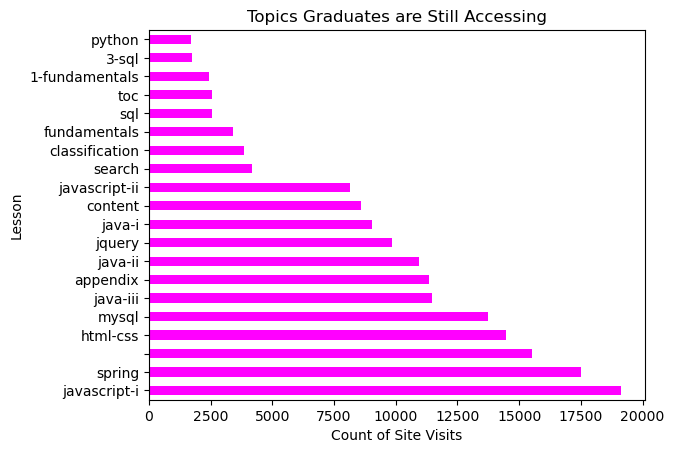

In [68]:
grads['module'].value_counts().head(20).plot.barh(colormap='spring')
plt.title('Topics Graduates are Still Accessing')
plt.xlabel('Count of Site Visits')
plt.ylabel('Lesson')
plt.show()

In [78]:
df[(df['module'].str.contains('ja')) & (df['module'].isna() == False)].module.value_counts().sum()

298525

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        847330 non-null  datetime64[ns]
 1   time        847330 non-null  object        
 2   path        847329 non-null  object        
 3   user_id     847330 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          847330 non-null  object        
 6   name        847330 non-null  object        
 7   start_date  847330 non-null  datetime64[ns]
 8   end_date    847330 non-null  datetime64[ns]
 9   module      847329 non-null  object        
 10  lesson      847329 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 77.6+ MB


In [ ]:
java = df[(df['module'].str.contains('ja')) & (df['module'].isna() == False)].module.value_counts().sum()

In [ ]:
df[(df['module'].str.contains('ja')) & (df['module'].isna() == False)].module.value_counts().sum()

In [81]:
df[(df['module'].str.contains('css')) & (df['module'].isna() == False)].module.value_counts().sum()

81576

In [89]:
grads['module'].value_counts().head(20)

javascript-i      19137
spring            17486
                  15524
html-css          14482
mysql             13755
java-iii          11459
appendix          11339
java-ii           10944
jquery             9830
java-i             9032
content            8585
javascript-ii      8136
search             4177
classification     3867
fundamentals       3410
sql                2573
toc                2564
1-fundamentals     2444
3-sql              1745
python             1723
Name: module, dtype: int64

In [84]:
df[df['module'] == ' ']

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson
timestamp,,,,,,,,,,,
